<a href="https://colab.research.google.com/github/chain13567/-Project-Collection1/blob/main/%E5%B0%87%E7%B6%B2%E8%B7%AF%E7%88%AC%E8%9F%B2%E7%9A%84%E8%B3%87%E6%96%99%E6%94%BE%E7%BD%AERDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 爬取 covid-19

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
url = "https://covid-19.nchc.org.tw/"
res = requests.get(url)
soup = BeautifulSoup(res.text,'html.parser')

In [ ]:
city_name = []
for i in soup.find_all(class_='btn btn-success btn-lg'):
  clean_link = i.get('href').split('=')[1]
  city_name.append(clean_link)
print(city_name)

['新北市', '台北市', '桃園市', '苗栗縣', '基隆市', '彰化縣', '台中市', '宜蘭縣', '新竹縣', '花蓮縣', '高雄市', '台南市', '新竹市', '屏東縣', '南投縣', '台東縣', '雲林縣', '嘉義縣', '嘉義市', '澎湖縣', '連江縣', '金門縣']


In [ ]:
import urllib
link_list = []
for j in range(len(city_name)):
  link = 'https://covid-19.nchc.org.tw/city_confirmed.php?mycity='+urllib.parse.quote(city_name[j])
  link_list.append(link)
print(link_list)

['https://covid-19.nchc.org.tw/city_confirmed.php?mycity=%E6%96%B0%E5%8C%97%E5%B8%82', 'https://covid-19.nchc.org.tw/city_confirmed.php?mycity=%E5%8F%B0%E5%8C%97%E5%B8%82', 'https://covid-19.nchc.org.tw/city_confirmed.php?mycity=%E6%A1%83%E5%9C%92%E5%B8%82', 'https://covid-19.nchc.org.tw/city_confirmed.php?mycity=%E8%8B%97%E6%A0%97%E7%B8%A3', 'https://covid-19.nchc.org.tw/city_confirmed.php?mycity=%E5%9F%BA%E9%9A%86%E5%B8%82', 'https://covid-19.nchc.org.tw/city_confirmed.php?mycity=%E5%BD%B0%E5%8C%96%E7%B8%A3', 'https://covid-19.nchc.org.tw/city_confirmed.php?mycity=%E5%8F%B0%E4%B8%AD%E5%B8%82', 'https://covid-19.nchc.org.tw/city_confirmed.php?mycity=%E5%AE%9C%E8%98%AD%E7%B8%A3', 'https://covid-19.nchc.org.tw/city_confirmed.php?mycity=%E6%96%B0%E7%AB%B9%E7%B8%A3', 'https://covid-19.nchc.org.tw/city_confirmed.php?mycity=%E8%8A%B1%E8%93%AE%E7%B8%A3', 'https://covid-19.nchc.org.tw/city_confirmed.php?mycity=%E9%AB%98%E9%9B%84%E5%B8%82', 'https://covid-19.nchc.org.tw/city_confirmed.php?myci

In [ ]:
!pip install pymysql  # python 與 SQL 結合

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.5 MB/s 


## 與 RDS 連接

In [ ]:
import pymysql
#import charts
# 資料庫設定
db_settings = {
    "host": "端點",
    "port": 3306,
    "user": "user_name",
    "password": "密碼"
}
try:
    # 建立Connection物件
    conn = pymysql.connect(**db_settings)
    print('ok')
except Exception as ex:
    print(ex)

ok


In [ ]:
db = pymysql.connect(**db_settings)
#建立操作游標
cursor = db.cursor()
#SQL語法
sql="show databases"
cursor.execute(sql)
db.commit()
for i in cursor:
  print(i)
#關閉連線
db.close()

('information_schema',)
('mydatabase',)
('mysql',)
('performance_schema',)
('sys',)


## 建立 covid-19 table

In [ ]:
db = pymysql.connect(**db_settings)
#建立操作游標
cursor = db.cursor()
#指定使用的資料庫
sql='use mydatabase'
cursor.execute(sql)
#SQL語法
sql="CREATE TABLE covid19 (id INT AUTO_INCREMENT PRIMARY KEY,city VARCHAR(255), link VARCHAR(255))"
try:
  cursor.execute(sql)
  #提交修改
  db.commit()
  print('success')
except:
  #發生錯誤時停止執行SQL
  db.rollback()
  print('error')

#關閉連線
db.close()

success


In [ ]:
db = pymysql.connect(**db_settings)
# #建立操作游標
cursor = db.cursor()
#指定使用的資料庫
sql='use mydatabase'
cursor.execute(sql)
#SQL語法
for i in range(len(city_name)):
  sql = "INSERT INTO covid19(city, link) VALUES ("+"'"+city_name[i]+"'"+","+"'"+link_list[i]+"'"+')'
#執行語法

  try:
    cursor.execute(sql)
    #提交修改
    db.commit()
    print('success')
  except:
    #發生錯誤時停止執行SQL
    db.rollback()
    print('error')

#關閉連線
db.close()

success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success


In [ ]:
db = pymysql.connect(**db_settings)
#建立操作游標
cursor = db.cursor()
#指定使用的資料庫
sql='use mydatabase'
cursor.execute(sql)
#SQL語法
sql="select * from covid19"
cursor.execute(sql)
db.commit()
result = cursor.fetchall()
print(result)
#關閉連線
db.close()

((1, '新北市', 'https://covid-19.nchc.org.tw/city_confirmed.php?mycity=%E6%96%B0%E5%8C%97%E5%B8%82'), (2, '台北市', 'https://covid-19.nchc.org.tw/city_confirmed.php?mycity=%E5%8F%B0%E5%8C%97%E5%B8%82'), (3, '桃園市', 'https://covid-19.nchc.org.tw/city_confirmed.php?mycity=%E6%A1%83%E5%9C%92%E5%B8%82'), (4, '苗栗縣', 'https://covid-19.nchc.org.tw/city_confirmed.php?mycity=%E8%8B%97%E6%A0%97%E7%B8%A3'), (5, '基隆市', 'https://covid-19.nchc.org.tw/city_confirmed.php?mycity=%E5%9F%BA%E9%9A%86%E5%B8%82'), (6, '彰化縣', 'https://covid-19.nchc.org.tw/city_confirmed.php?mycity=%E5%BD%B0%E5%8C%96%E7%B8%A3'), (7, '台中市', 'https://covid-19.nchc.org.tw/city_confirmed.php?mycity=%E5%8F%B0%E4%B8%AD%E5%B8%82'), (8, '宜蘭縣', 'https://covid-19.nchc.org.tw/city_confirmed.php?mycity=%E5%AE%9C%E8%98%AD%E7%B8%A3'), (9, '新竹縣', 'https://covid-19.nchc.org.tw/city_confirmed.php?mycity=%E6%96%B0%E7%AB%B9%E7%B8%A3'), (10, '花蓮縣', 'https://covid-19.nchc.org.tw/city_confirmed.php?mycity=%E8%8A%B1%E8%93%AE%E7%B8%A3'), (11, '高雄市', 'https

# 爬取 shopback 

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
!pip install pymysql  # python 與 SQL 結合

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 2.3 MB/s 


## 與 RDS 連接

In [ ]:
import pymysql
#import charts
# 資料庫設定
db_settings = {
    "host": "RDS_端點",
    "port": 3306,
    "user": "user_name",
    "password": "密碼"
}
try:
    # 建立Connection物件
    conn = pymysql.connect(**db_settings)
    print('ok')
except Exception as ex:
    print(ex)

ok


## 爬取 shopback 品牌及其資訊

In [ ]:
shopback_url = "https://www.shopback.com.tw/"
shopback_res = requests.get(shopback_url)
shopback_res.encoding='utf-8' 
shopback_soup = BeautifulSoup(shopback_res.text,'html.parser')

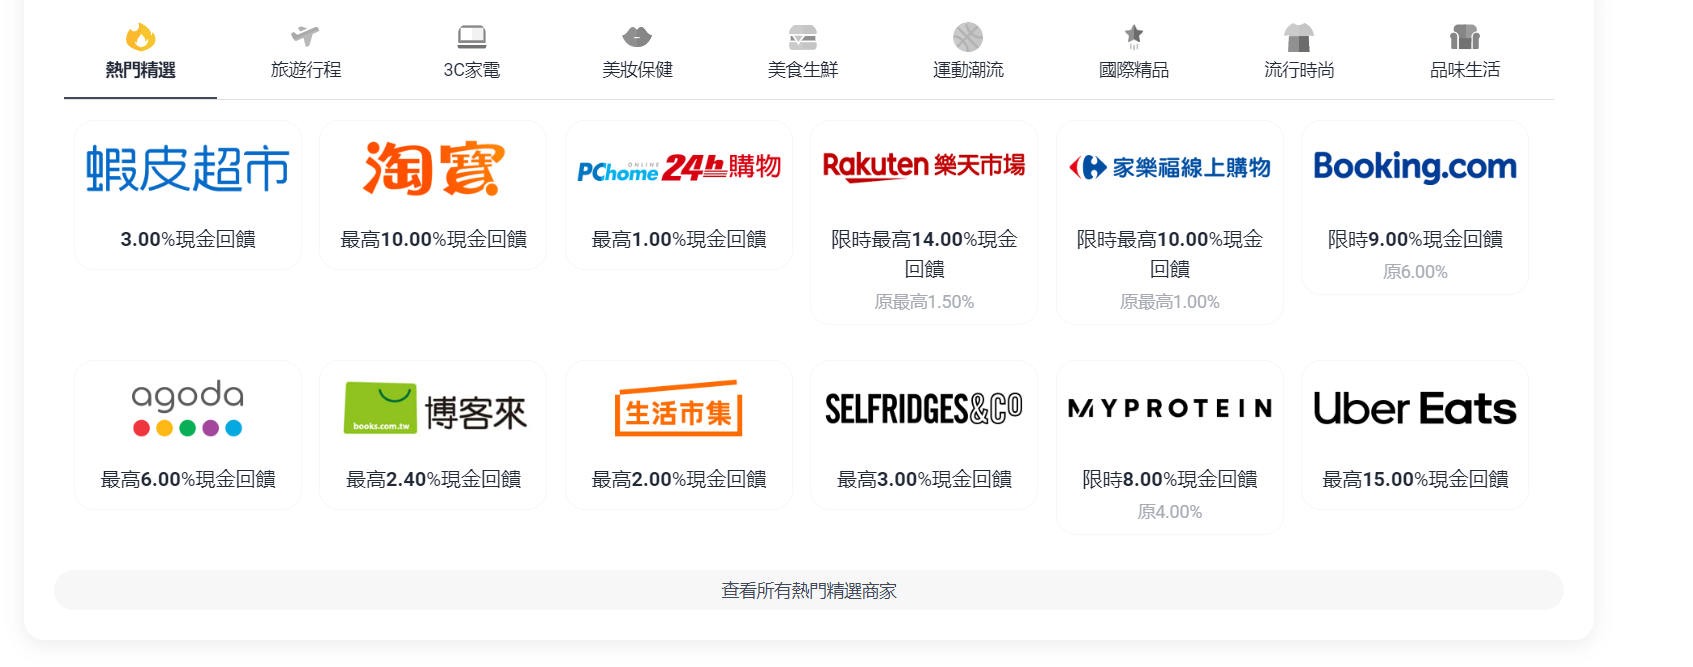

In [ ]:
shop_name = []
for i in shopback_soup.find_all(class_='molecule__offer-card'):
  clean_data_link = i.get('data-feature-name')
  if clean_data_link != 'Adidas':
    # print(clean_data_link)
    shop_name.append(clean_data_link)
print(shop_name)
print(len(shop_name))

['蝦皮超市', '淘寶網 Taobao', 'PChome 24h購物', '樂天市場', '家樂福線上購物', 'Booking.com', 'Agoda', '博客來', '生活市集', 'Selfridges & Co.', 'MyProtein', 'Uber Eats', 'Booking.com', 'Agoda', 'Trip.com', 'Hotels.com', 'Expedia', 'AsiaYo', 'KKday', 'Klook', 'RentalCars 旅途客', '雄獅旅遊', '東南旅遊', 'Tripbaa 趣吧！', 'PChome 24h購物', 'Apple', 'Lenovo 聯想', '燦坤線上購物TKEC', 'Yahoo!奇摩購物中心', '樂天市場', '東森購物 ETMall', 'EcLife良興購物網', '有閑電商 Jolly Buy', '遠傳friDay購物', 'Dyson', 'myfone購物', 'Sephora', '屈臣氏 Watsons', 'DOKODEMO 多和夢', 'EBISU惠比壽日藥直送', '小三美日', '桂格官方嚴選-佳格健康GO', 'Selfridges & Co.', '白蘭氏', 'iQueen 愛女人購物網', 'lookfantastic', 'Vitacost', 'Unineed', 'Uber Eats', 'foodpanda', '愛上新鮮i3Fresh', '家樂福線上購物', 'GOMAJI 夠麻吉', '7-ELEVEN線上購物中心', 'SuperBuy 市集', '熊媽媽買菜網', '鮮食家', '鮮綠生活 36Life', '17Life', '塔吉特千層蛋糕', 'Nike', 'FILA', 'adidas', 'lululemon', 'Under Armour', 'Harrods', 'YYSports', '24S', 'Superdry 極度乾燥', 'MyProtein', 'HBX', 'Moosejaw', '24S', 'Farfetch', 'NET-A-PORTER', 'HBX', 'MATCHESFASHION', 'Luisa Via Roma', 'Harrods', 'YOOX', 'ASOS', 'S

In [ ]:
discount_pa = []
for j in shopback_soup.find_all(class_='atom__typo atom__typo--type-cashback'):
  # print(j.text)
  clean_discount_link = j.text 
  if clean_discount_link != 'Up to 95% Cashback':
    # print(clean_discount_link)
    discount_pa.append(clean_discount_link)
print(discount_pa)
print(len(discount_pa))

['3.00%現金回饋', '最高10.00%現金回饋', '最高1.00%現金回饋', '限時最高14.00%現金回饋', '最高1.00%現金回饋', '限時最高11.00%現金回饋', '最高6.00%現金回饋', '最高2.40%現金回饋', '限時最高5.00%現金回饋', '最高3.00%現金回饋', '限時8.00%現金回饋', '最高15.00%現金回饋', '限時最高11.00%現金回饋', '最高6.00%現金回饋', '最高5.00%現金回饋', '最高3.00%現金回饋', '最高3.00%現金回饋', '最高3.50%現金回饋', '3.50%現金回饋', '最高3.00%現金回饋', '6%現金回饋', '最高3.50%現金回饋', '最高3.50%現金回饋', '2.50%現金回饋', '最高1.00%現金回饋', '最高1.00%現金回饋', '2.00%現金回饋', '最高1.00%現金回饋', '最高1.50%現金回饋', '限時最高14.00%現金回饋', '最高1.50%現金回饋', '2.00%現金回饋', '最高2.50%現金回饋', '最高2.00%現金回饋', '2.50%現金回饋', '1.50%現金回饋', '最高4.00%現金回饋', '最高2.00%現金回饋', '1.50%現金回饋', '1.50%現金回饋', '3%現金回饋', '6.00%現金回饋', '最高3.00%現金回饋', '最高6.00%現金回饋', '限時7.00%現金回饋', '限時11.00%現金回饋', '0.50%現金回饋', '3.00%現金回饋', '最高15.00%現金回饋', '最高7.00%現金回饋', '8.00%現金回饋', '最高1.00%現金回饋', '最高3.50%現金回饋', '最高1.00%現金回饋', '最高5.00%現金回饋', '最高3.50%現金回饋', '3.5%現金回饋', '4.00%現金回饋', '最高5.00%現金回饋', '3.50%現金回饋', '最高6.00%現金回饋', '4.00%現金回饋', '4.00%現金回饋', '3.50%現金回饋', '限時14.00%現金回饋', '限時最高9.00%現金回饋', '3.50%現金回饋', '最高4.00%現金回饋', '限時最高5.50

In [ ]:
herf=[]
for a in shopback_soup.find_all(class_='molecule__offer-card__merchant'):
  # print(a)
  # print(a.find('a').get('href'))
  clean_herf_link = a.find('a').get('href')
  # print(clean_herf_link)
  if clean_herf_link != 'http://www.shopback.sg/adidas':
    link = 'https://www.shopback.com.tw'+str(clean_herf_link)
    herf.append(link)
print(herf)
print(len(herf))

['https://www.shopback.com.tw/shopee-mart', 'https://www.shopback.com.tw/taobao', 'https://www.shopback.com.tw/24h-pchome', 'https://www.shopback.com.tw/rakuten', 'https://www.shopback.com.tw/online-carrefour', 'https://www.shopback.com.tw/booking-com', 'https://www.shopback.com.tw/agoda', 'https://www.shopback.com.tw/books-com-tw', 'https://www.shopback.com.tw/buy123', 'https://www.shopback.com.tw/selfridges', 'https://www.shopback.com.tw/myprotein', 'https://www.shopback.com.tw/ubereats', 'https://www.shopback.com.tw/booking-com', 'https://www.shopback.com.tw/agoda', 'https://www.shopback.com.tw/ctrip', 'https://www.shopback.com.tw/hotels-com', 'https://www.shopback.com.tw/expedia', 'https://www.shopback.com.tw/asiayo', 'https://www.shopback.com.tw/kkday', 'https://www.shopback.com.tw/klook', 'https://www.shopback.com.tw/rentalcars', 'https://www.shopback.com.tw/liontravel', 'https://www.shopback.com.tw/settour', 'https://www.shopback.com.tw/tripbaa', 'https://www.shopback.com.tw/24h

## 透過品牌連結爬取各品牌活動

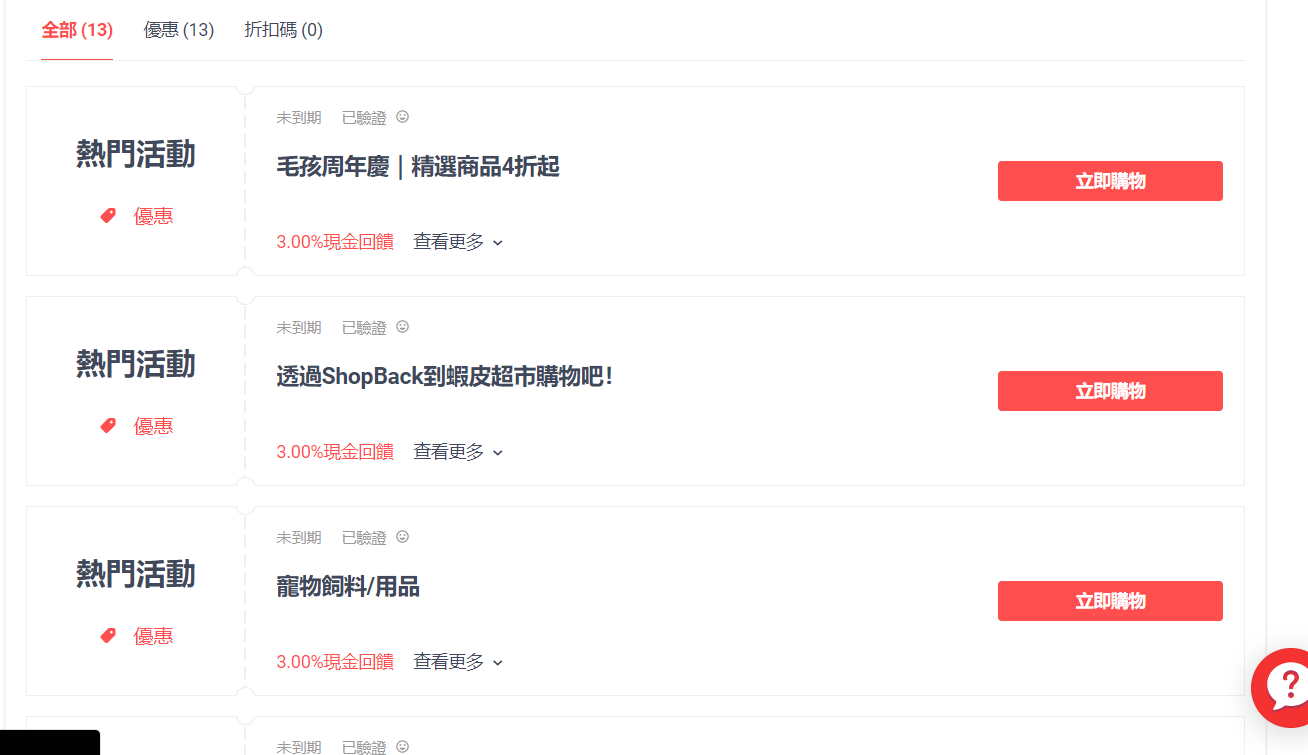

In [ ]:
herf_event = []
detail_event = []
for b in herf:
  #if b == 'https://www.shopback.com.tw/24h-pchome':
    #break
  # print(b)
  detail_url = b
  detail_res = requests.get(detail_url)
  detail_res.encoding='utf-8' 
  detail_soup = BeautifulSoup(detail_res.text,'html.parser')
  for c in detail_soup.find_all(class_='store-deal__voucher-desc mb-2 text-sm sm:text-lg font-bold cursor-pointer'):
    print(b)
    herf_event.append(b)
    clean_detail_information = c.text
    for d in detail_soup.find_all(class_='text-sb-slate sm:text-sb-coral mr-4'):
      clean_detail_back = d.text
    all_info = clean_detail_information + ' : ' +clean_detail_back
    detail_event.append(all_info)
    print(all_info)

https://www.shopback.com.tw/shopee-mart
毛孩周年慶｜精選商品4折起 : 3.00%現金回饋
https://www.shopback.com.tw/shopee-mart
透過ShopBack到蝦皮超市購物吧！ : 3.00%現金回饋
https://www.shopback.com.tw/shopee-mart
寵物飼料/用品 : 3.00%現金回饋
https://www.shopback.com.tw/shopee-mart
宅家熱銷排行榜 : 3.00%現金回饋
https://www.shopback.com.tw/shopee-mart
大牌尿布熱銷5折up : 3.00%現金回饋
https://www.shopback.com.tw/shopee-mart
流行彩妝放膽美 : 3.00%現金回饋
https://www.shopback.com.tw/shopee-mart
專櫃美妝超經典 : 3.00%現金回饋
https://www.shopback.com.tw/shopee-mart
營養保健夯首選 : 3.00%現金回饋
https://www.shopback.com.tw/shopee-mart
私密呵護零負評 : 3.00%現金回饋
https://www.shopback.com.tw/shopee-mart
吃飯吃麵最止餓 : 3.00%現金回饋
https://www.shopback.com.tw/shopee-mart
異國零食通通有 : 3.00%現金回饋
https://www.shopback.com.tw/shopee-mart
解膩止渴最清涼 : 3.00%現金回饋
https://www.shopback.com.tw/shopee-mart
透過 ShopBack 至蝦皮超市享現金回饋 : 3.00%現金回饋
https://www.shopback.com.tw/taobao
透過 ShopBack 小幫手或上方搜尋引擎搜尋商品，賺最高 10% 現金回饋 : 最高10.00%現金回饋
https://www.shopback.com.tw/taobao
數位家電｜小家電大品牌，打造理想生活 : 最高10.00%現金回饋
https://www.shopback.com.

In [ ]:
len(herf_event)

1724

In [ ]:
herf_event[999]

'https://www.shopback.com.tw/selfridges'

In [ ]:
len(detail_event)

1724

In [ ]:
detail_event[999]

'日本貴婦級火熱品牌 - SUQQU 六色腮紅 16.5g : 最高3.00%現金回饋'

## DROP TABLE (init 用途)

### DROP shop_back

In [ ]:
db = pymysql.connect(**db_settings)
#建立操作游標
cursor = db.cursor()
#指定使用的資料庫
sql='use mydatabase'
cursor.execute(sql)
#SQL語法
sql="DROP TABLE shop_back"
try:
  cursor.execute(sql)
  #提交修改
  db.commit()
  print('success')
except:
  #發生錯誤時停止執行SQL
  db.rollback()
  print('error')

#關閉連線
db.close()

success


### DROP detail_activity

In [ ]:
db = pymysql.connect(**db_settings)
#建立操作游標
cursor = db.cursor()
#指定使用的資料庫
sql='use mydatabase'
cursor.execute(sql)
#SQL語法
sql="DROP TABLE detail_activity"
try:
  cursor.execute(sql)
  #提交修改
  db.commit()
  print('success')
except:
  #發生錯誤時停止執行SQL
  db.rollback()
  print('error')

#關閉連線
db.close()

success


## 建立 TABLE

### 建立 shop_back table

In [ ]:
db = pymysql.connect(**db_settings)
#建立操作游標
cursor = db.cursor()
#指定使用的資料庫
sql='use mydatabase'
cursor.execute(sql)
#SQL語法
sql="CREATE TABLE shop_back (id INT AUTO_INCREMENT PRIMARY KEY,shopname VARCHAR(255),discount VARCHAR(255),link VARCHAR(255))"
try:
  cursor.execute(sql)
  #提交修改
  db.commit()
  print('success')
except:
  #發生錯誤時停止執行SQL
  db.rollback()
  print('error')

#關閉連線
db.close()

success


### 建立 detail_activity Table

In [ ]:
db = pymysql.connect(**db_settings)
#建立操作游標
cursor = db.cursor()
#指定使用的資料庫
sql='use mydatabase'
cursor.execute(sql)
#SQL語法
sql="CREATE TABLE detail_activity (id INT AUTO_INCREMENT PRIMARY KEY, link VARCHAR(255), activity VARCHAR(255))"
try:
  cursor.execute(sql)
  #提交修改
  db.commit()
  print('success')
except:
  #發生錯誤時停止執行SQL
  db.rollback()
  print('error')

#關閉連線
db.close()

success


## 將爬取的資料放入資料庫中

### shop_back table

In [ ]:
db = pymysql.connect(**db_settings)
# #建立操作游標
cursor = db.cursor()
#指定使用的資料庫
sql='use mydatabase'
cursor.execute(sql)
#SQL語法
for i in range(len(shop_name)):
  sql = "INSERT INTO shop_back(shopname, discount, link) VALUES ("+"'"+shop_name[i]+"'"+","+"'"+discount_pa[i]+"'"+","+"'"+herf[i]+"'"+')'#執行語法

  try:
    cursor.execute(sql)
    #提交修改
    db.commit()
    print('success')
  except:
    #發生錯誤時停止執行SQL
    db.rollback()
    print('error')

#關閉連線
db.close()

success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success


### detail_activity table

In [ ]:
db = pymysql.connect(**db_settings)
# #建立操作游標
cursor = db.cursor()
#指定使用的資料庫
sql='use mydatabase'
cursor.execute(sql)
#SQL語法
for i in range(len(detail_event)):
  sql = "INSERT INTO detail_activity(link, activity) VALUES ("+"'"+herf_event[i]+"'"+","+"'"+detail_event[i]+"'"+')' #執行語法

  try:
    cursor.execute(sql)
    #提交修改
    db.commit()
    print('success')
  except:
    #發生錯誤時停止執行SQL
    db.rollback()
    print('error')

#關閉連線
db.close()

success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success


In [ ]:
db = pymysql.connect(**db_settings)
# #建立操作游標
cursor = db.cursor()
#指定使用的資料庫
sql='use mydatabase'
cursor.execute(sql)
#SQL語法
for i in range(len(detail_event)-999):
  sql = "INSERT INTO detail_activity(link, activity) VALUES ("+"'"+herf_event[i+999]+"'"+","+"'"+detail_event[i+999]+"'"+')' #執行語法

  try:
    cursor.execute(sql)
    #提交修改
    db.commit()
    print('success')
  except:
    #發生錯誤時停止執行SQL
    db.rollback()
    print('error')

#關閉連線
db.close()

success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success


## 查詢結果

In [ ]:
db = pymysql.connect(**db_settings)
#建立操作游標
cursor = db.cursor()
#指定使用的資料庫
sql='use mydatabase'
cursor.execute(sql)
#SQL語法
sql="select * from shop_back"
cursor.execute(sql)
db.commit()
result = cursor.fetchall()
print(result)
#關閉連線
db.close()

((1, '蝦皮超市', '3.00%現金回饋', 'https://www.shopback.com.tw/shopee-mart'), (2, '淘寶網 Taobao', '最高10.00%現金回饋', 'https://www.shopback.com.tw/taobao'), (3, 'PChome 24h購物', '最高1.00%現金回饋', 'https://www.shopback.com.tw/24h-pchome'), (4, '樂天市場', '限時最高14.00%現金回饋', 'https://www.shopback.com.tw/rakuten'), (5, '家樂福線上購物', '限時最高6.00%現金回饋', 'https://www.shopback.com.tw/online-carrefour'), (6, 'Booking.com', '最高6.00%現金回饋', 'https://www.shopback.com.tw/booking-com'), (7, 'Agoda', '最高6.00%現金回饋', 'https://www.shopback.com.tw/agoda'), (8, '博客來', '最高2.40%現金回饋', 'https://www.shopback.com.tw/books-com-tw'), (9, '生活市集', '最高2.00%現金回饋', 'https://www.shopback.com.tw/buy123'), (10, 'Selfridges & Co.', '最高3.00%現金回饋', 'https://www.shopback.com.tw/selfridges'), (11, 'MyProtein', '4.00%現金回饋', 'https://www.shopback.com.tw/myprotein'), (12, 'Uber Eats', '最高15.00%現金回饋', 'https://www.shopback.com.tw/ubereats'), (13, 'Booking.com', '最高6.00%現金回饋', 'https://www.shopback.com.tw/booking-com'), (14, 'Agoda', '最高6.00%現金回饋', 'https:/

In [ ]:
db = pymysql.connect(**db_settings)
#建立操作游標
cursor = db.cursor()
#指定使用的資料庫
sql='use mydatabase'
cursor.execute(sql)
#SQL語法
sql="select shopname, detail_activity.link, activity from shop_back, detail_activity where shop_back.link = detail_activity.link"
cursor.execute(sql)
db.commit()
result = cursor.fetchall()
print(result)
#關閉連線
db.close()

(('蝦皮超市', 'https://www.shopback.com.tw/shopee-mart', '毛孩周年慶｜精選商品4折起 : 3.00%現金回饋'), ('蝦皮超市', 'https://www.shopback.com.tw/shopee-mart', '透過ShopBack到蝦皮超市購物吧！ : 3.00%現金回饋'), ('蝦皮超市', 'https://www.shopback.com.tw/shopee-mart', '寵物飼料/用品 : 3.00%現金回饋'), ('蝦皮超市', 'https://www.shopback.com.tw/shopee-mart', '宅家熱銷排行榜 : 3.00%現金回饋'), ('蝦皮超市', 'https://www.shopback.com.tw/shopee-mart', '大牌尿布熱銷5折up : 3.00%現金回饋'), ('蝦皮超市', 'https://www.shopback.com.tw/shopee-mart', '流行彩妝放膽美 : 3.00%現金回饋'), ('蝦皮超市', 'https://www.shopback.com.tw/shopee-mart', '專櫃美妝超經典 : 3.00%現金回饋'), ('蝦皮超市', 'https://www.shopback.com.tw/shopee-mart', '營養保健夯首選 : 3.00%現金回饋'), ('蝦皮超市', 'https://www.shopback.com.tw/shopee-mart', '私密呵護零負評 : 3.00%現金回饋'), ('蝦皮超市', 'https://www.shopback.com.tw/shopee-mart', '吃飯吃麵最止餓 : 3.00%現金回饋'), ('蝦皮超市', 'https://www.shopback.com.tw/shopee-mart', '異國零食通通有 : 3.00%現金回饋'), ('蝦皮超市', 'https://www.shopback.com.tw/shopee-mart', '解膩止渴最清涼 : 3.00%現金回饋'), ('蝦皮超市', 'https://www.shopback.com.tw/shopee-mart', '透過 ShopBack 至